In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import squarify  # For creating treemaps
import seaborn as sns
import tensorflow as tf
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dropout
from datetime import datetime

In [2]:
# Load the dataset
file_path = "./Resources/Final customer dataset.csv"
df_sentiment = pd.read_csv(file_path)
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [3]:
# Review the DataFrame
df_sentiment.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,4625100001,2020-09-08 9:38,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,4625100001,2022-03-05 12:56,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,4625100001,2022-05-23 18:18,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,4625100001,2020-11-12 13:13,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,1359300001,2020-11-27 17:55,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [4]:
# columns before change
df_sentiment.columns

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'],
      dtype='object')

In [5]:
#Remove rows with null values
df_cleaned = df_sentiment.dropna()
df_cleaned.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,4625100001,2020-09-08 9:38,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,4625100001,2022-03-05 12:56,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,4625100001,2022-05-23 18:18,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,4625100001,2020-11-12 13:13,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,1359300001,2020-11-27 17:55,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [6]:
#total rows after removing nulls
df_cleaned.count()

Customer ID              405022
Purchase Date            405022
Product Category         405022
Product Price            405022
Quantity                 405022
Total Purchase Amount    405022
Payment Method           405022
Customer Age             405022
Returns                  405022
Customer Name            405022
Age                      405022
Gender                   405022
Churn                    405022
dtype: int64

In [7]:
# Remove duplicate rows based on columns 
df_no_duplicates = df_cleaned.drop_duplicates()  
df_no_duplicates.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,4625100001,2020-09-08 9:38,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,4625100001,2022-03-05 12:56,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,4625100001,2022-05-23 18:18,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,4625100001,2020-11-12 13:13,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,1359300001,2020-11-27 17:55,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [8]:
# check the shape of the cleaned DataFrame to verify the number of rows and columns
df_no_duplicates.shape

(405022, 13)

In [9]:
# Display the data types
df_cleaned.dtypes

Customer ID                int64
Purchase Date             object
Product Category          object
Product Price              int64
Quantity                   int64
Total Purchase Amount      int64
Payment Method            object
Customer Age               int64
Returns                  float64
Customer Name             object
Age                        int64
Gender                    object
Churn                      int64
dtype: object

In [10]:
# Remove a column permanently from the DataFrame
df_final= df_cleaned.drop(columns=['Age'])
df_final.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Gender,Churn
0,4625100001,2020-09-08 9:38,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,Male,0
1,4625100001,2022-03-05 12:56,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,Male,0
2,4625100001,2022-05-23 18:18,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,Male,0
3,4625100001,2020-11-12 13:13,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,Male,0
4,1359300001,2020-11-27 17:55,Home,449,1,3452,Credit Card,49,0.0,James Grant,Female,1


In [11]:
# Summary statistics
df_final.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Churn
count,4.050220e+05,405022.000000,405022.000000,405022.000000,405022.000000,405022.000000,405022.000000
mean,1.250051e+09,254.638383,3.003847,2725.474419,43.872182,0.499343,0.200256
std,1.613158e+09,141.643090,1.414393,1441.902782,15.355357,0.500000,0.400192
min,1.000000e+00,10.000000,1.000000,100.000000,18.000000,0.000000,0.000000
25%,2.500600e+04,132.000000,2.000000,1478.000000,30.000000,0.000000,0.000000
50%,4.997900e+04,255.000000,3.000000,2727.000000,44.000000,0.000000,0.000000
75%,2.500400e+09,377.000000,4.000000,3973.000000,57.000000,1.000000,0.000000
max,5.000000e+09,500.000000,5.000000,5350.000000,70.000000,1.000000,1.000000


In [12]:
# columns before change
df_final.columns

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Gender', 'Churn'],
      dtype='object')

In [13]:
#Convert `Purchase Date` dtype to Datetime
df_final['Purchase Date'] = pd.to_datetime(df_final['Purchase Date'], errors='coerce')

# Split Year and Month into new columns
df_final['Purchase Year'] = df_final['Purchase Date'].dt.year
df_final['Purchase Month'] = df_final['Purchase Date'].dt.month_name()

# Display the first few rows of the relevant columns
df_final[['Purchase Date', 'Purchase Year', 'Purchase Month']].head()

,Purchase Date,Purchase Year,Purchase Month
0,2020-09-08 09:38:00,2020,September
1,2022-03-05 12:56:00,2022,March
2,2022-05-23 18:18:00,2022,May
3,2020-11-12 13:13:00,2020,November
4,2020-11-27 17:55:00,2020,November


In [14]:
# columns after change
df_final.columns

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Gender', 'Churn', 'Purchase Year',
       'Purchase Month'],
      dtype='object')

In [15]:
# calculate total purchase amount
# Create a new column `Total Price` by multiplying `Product Price` and `Quantity`
df_final['Total Price'] = df_final['Product Price'] * df_final['Quantity']

# Define the order of columns, including the newly calculated `Total Price`
columns = [
    'Customer ID', 'Customer Name', 'Purchase Date', 'Purchase Year', 'Purchase Month',
    'Product Category', 'Product Price', 'Quantity', 'Total Purchase Amount', 'Total Price', 'Payment Method',
    'Returns', 'Gender', 'Customer Age', 'Churn'
]

# Reorder the columns as specified
df_final = df_final[columns]
df_final.head()

,Customer ID,Customer Name,Purchase Date,Purchase Year,Purchase Month,Product Category,Product Price,Quantity,Total Purchase Amount,Total Price,Payment Method,Returns,Gender,Customer Age,Churn
0,4625100001,Christine Hernandez,2020-09-08 09:38:00,2020,September,Electronics,12,3,740,36,Credit Card,0.0,Male,37,0
1,4625100001,Christine Hernandez,2022-03-05 12:56:00,2022,March,Home,468,4,2739,1872,PayPal,0.0,Male,37,0
2,4625100001,Christine Hernandez,2022-05-23 18:18:00,2022,May,Home,288,2,3196,576,PayPal,0.0,Male,37,0
3,4625100001,Christine Hernandez,2020-11-12 13:13:00,2020,November,Clothing,196,1,3509,196,PayPal,0.0,Male,37,0
4,1359300001,James Grant,2020-11-27 17:55:00,2020,November,Home,449,1,3452,449,Credit Card,0.0,Female,49,1


In [16]:
# Summarize object variables(Non numeric data)
df_final.describe(include=['object'])

,Customer Name,Purchase Month,Product Category,Payment Method,Gender
count,405022,405022,405022,405022,405022
unique,69896,12,4,4,2
top,Michael Smith,August,Clothing,Credit Card,Male
freq,174,37307,111483,148911,202525


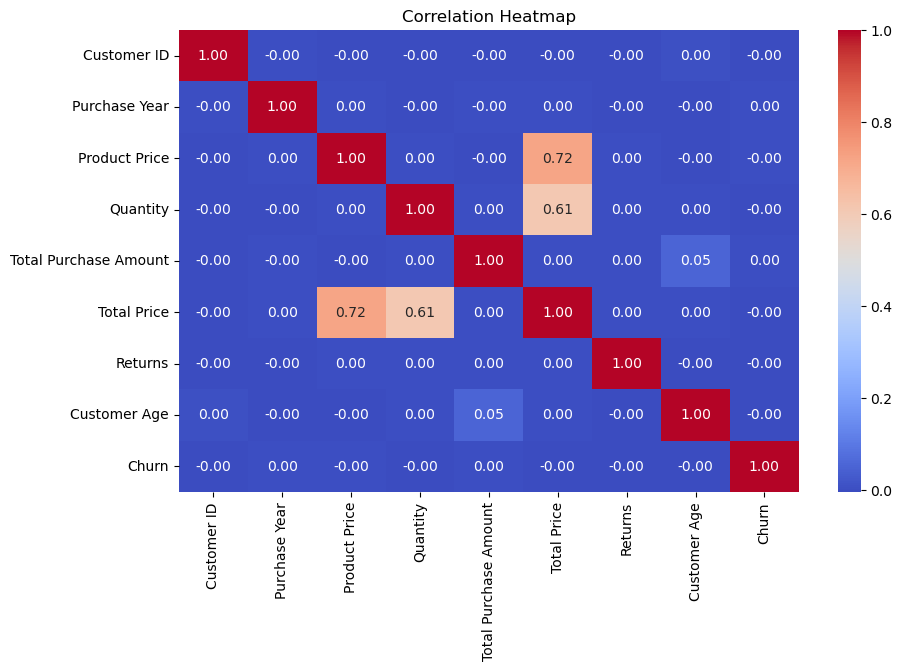

In [17]:
# Visualize distribution of a key column (e.g., 'sentiment' or 'purchase_count')
if 'sentiment' in df_final.columns:
    sns.countplot(data=df_final, x='sentiment')
    plt.title("Distribution of Sentiment Labels")
    plt.show()

# Filter numerical columns for correlation heatmap
numerical_df = df_final.select_dtypes(include=['number'])  # Select only numeric columns
if numerical_df.empty:
    print("No numerical columns available for correlation heatmap.")
else:
    plt.figure(figsize=(10, 6))
    sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()


In [18]:
# calculate count for each gender
gender_count = df_final['Gender'].value_counts()
# create pie chart
fig1 = px.pie(values=gender_count, names=gender_count.index,
              color = gender_count.index,
              color_discrete_map={'Female':'pink', 'Male':'#blue'},
              title='1. Gender Distribution')
# adjust in-graph text
fig1.update_traces(textposition='inside', textinfo='text', 
                   texttemplate='%{label}<br>%{value}<br>(%{percent})')
# adjust chart size and remove legend
#fig1.update_layout(title={'x': 0.5, 'y': 0.9},
                   #width=400, height=400, showlegend=False)
# display graphs
fig1.show()

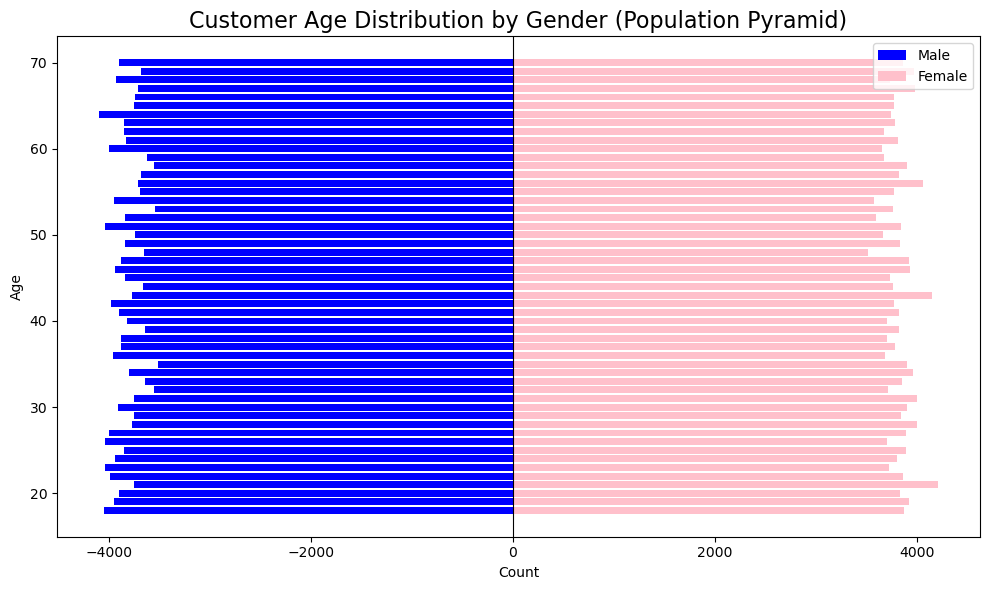

In [19]:
# Preparing the data for the population pyramid
age_gender_data = df_final.groupby(['Gender', 'Customer Age']).size().unstack(fill_value=0)
age_gender_data = age_gender_data.transpose()  # Transpose for easier plotting

# Reverse the values for males to mirror the chart
age_gender_data['Male'] = -age_gender_data['Male']

# Creating the pyramid chart
plt.figure(figsize=(10, 6))
plt.barh(age_gender_data.index, age_gender_data['Male'], color='blue', label='Male')
plt.barh(age_gender_data.index, age_gender_data['Female'], color='pink', label='Female')

# Adding chart details
plt.title('Customer Age Distribution by Gender (Population Pyramid)', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Age')
plt.axvline(0, color='black', linewidth=0.8)  # Add a vertical line at 0 for separation
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [20]:
# Define bins for age groups
age_bins = [0,9,19,29,39,49,59,69,np.inf]
age_labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70+']

# Add a new column and assign age group category to each transaction in df_2
df_final['Age Group'] = pd.cut(df_final['Customer Age'], bins=age_bins, labels=age_labels) 

# Check if `Age Group` is assigned correctly and added to the dataset
df_final[['Customer ID','Customer Age','Age Group']].sort_values('Customer Age', ascending=False)

,Customer ID,Customer Age,Age Group
487109,47411,70,70+
445541,39079,70,70+
383917,26784,70,70+
271891,4389,70,70+
271890,4389,70,70+
...,...,...,...
67959,2232600001,18,10-19
67957,2232600001,18,10-19
341533,18367,18,10-19
11978,4255200001,18,10-19


In [21]:
# Age distribution by age
df_final['Age Group'] = pd.Categorical(df_final['Age Group'], categories=age_labels, ordered=True)

# Count each age group
age_group_count = df_final['Age Group'].value_counts().sort_index().reset_index(name='Count')

# Calculate the percentage for each age group
age_group_count['Percentage'] = round(age_group_count['Count'] / age_group_count['Count'].sum()*100, 2)
age_group_count['Percentage Text'] = age_group_count['Percentage'].astype(str) + '%'

# Plot a line chart with bars
fig1 = px.line(age_group_count,x='Age Group', y='Count',
               title='Age Distribution',
               markers=True,
               text='Percentage Text',
               labels={'Count': 'Number of Customers'})

fig1.update_traces(textposition="top center") #adjust text position for percentages 
fig1.add_bar(x=age_group_count['Age Group'], y=age_group_count['Count'], text=age_group_count['Count'], textposition='inside', name='Count')
fig1.update_traces(textfont_color='white', selector=dict(type='bar'))
fig1.update_layout(title={'x': 0.5, 'y': 0.9},
                   xaxis_title= None,
                   yaxis_title= 'Count',
                   width=750, height=450, 
                   showlegend=False)
# display graphs
fig1.show()

In [22]:
# Age distrbution by gender

age_group_gender_count = df_final[['Gender','Age Group']].value_counts().reset_index(name='Count')

fig2 = px.bar(age_group_gender_count, x='Age Group', y='Count', 
              color='Gender', barmode='group', 
              color_discrete_map={'Female': '#FF6692', 'Male': '#3366CC'},
              category_orders={'Age Group': age_labels},
              title='Age Distribution by Gender',
              text_auto=True)
fig2.update_layout(title={'x': 0.5, 'y': 0.9},
                   width=750, height=450,
                   xaxis_title= None,
                   legend_title=None,
                   legend=dict(orientation="h",yanchor="bottom",
                               y=1.02, xanchor="center",x=0.5))

# display graphs
fig2.show()

In [23]:
# Average price spent by age group

overall_avg_price = df_final['Total Price'].mean()
avg_price_age_group = df_final.groupby(['Age Group'])['Total Price'].mean().reset_index(name='Avg Price')

fig3 = px.bar(avg_price_age_group, x= 'Age Group', y= 'Avg Price', 
              color = 'Avg Price',
              color_continuous_scale= "peach", 
              category_orders={'Age Group': age_labels},
              title='Average Price Spent by Age Group',
              text= [f"${value:.2f}" for value in avg_price_age_group['Avg Price']],
              hover_data={'Age Group':True, 'Avg Price':"${:.2f}"})

# Adjust data and format shown in the hover data
fig3.update_traces(hovertemplate="Age Group: %{x}<br>"
                                 "Average Spending: %{y:$,.2f}")

# Add a line to show the overall average for spending 
fig3.add_hline(y=overall_avg_price, line_dash="dash", line_color="darkblue",
               annotation_text=f'Overall Average: ${overall_avg_price:.2f}',
               annotation_font_color="black",
               annotation_position="top left")

fig3.update_layout(title={'x': 0.5, 'y': 0.9},
                   width=700, height=450,
                   xaxis_title= None, 
                   yaxis_title= 'Average Spending ($)',
                   yaxis=dict(range=[500, 800],  # Set range from 400 to 800
                              tick0=500,  # Set starting tick at 400
                              dtick=50),  # Set interval between ticks
                   showlegend=False)

# display graphs
fig3.show()

C:\Users\zarap\AppData\Local\Temp\ipykernel_45204\2946905049.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [24]:
# need to calculate the Return_Quantity when Returns == 1  

df_final['Return Quantity'] = df_final.apply(lambda row: row['Quantity'] if row['Returns'] == 1 else 0, axis=1)

product_summary_table = df_final.groupby('Product Category').agg(Count=('Product Category', 'size'),
                                               Order_Quantity=('Quantity', 'sum'),
                                               Total_Revenue=('Total Price','sum'),
                                               Average_Revenue=('Total Price','mean'),
                                               Return_Count=('Return Quantity', 'sum')).reset_index()
product_summary_table

,Product Category,Count,Order_Quantity,Total_Revenue,Average_Revenue,Return_Count
0,Books,111014,332643,84718082,763.129713,167122
1,Clothing,111483,335882,85318134,765.301741,167077
2,Electronics,91361,274215,69886160,764.945217,137007
3,Home,91164,273884,69955934,767.363587,136699


In [25]:
# Calculate the overall percentage for product quantity sold
total_order_quantity = product_summary_table['Order_Quantity'].sum()
product_summary_table['Overall_Percentage'] = (product_summary_table['Order_Quantity'] / total_order_quantity) * 100

# Calculate the percentage for return
product_summary_table['Return_Rate'] = round((product_summary_table['Return_Count'] / product_summary_table['Order_Quantity']) * 100, 2)

product_summary_table

,Product Category,Count,Order_Quantity,Total_Revenue,Average_Revenue,Return_Count,Overall_Percentage,Return_Rate
0,Books,111014,332643,84718082,763.129713,167122,27.341479,50.24
1,Clothing,111483,335882,85318134,765.301741,167077,27.607708,49.74
2,Electronics,91361,274215,69886160,764.945217,137007,22.539010,49.96
3,Home,91164,273884,69955934,767.363587,136699,22.511803,49.91


In [26]:
# Set the category order for plotting colors
category_order = ["Electronics", "Clothing", "Home", "Books"]

fig1 = px.bar(product_summary_table, 
             x='Product Category', 
             y=['Order_Quantity', 'Return_Count'],
             barmode='overlay', opacity=0.7,
             color='Product Category',
             color_discrete_sequence=px.colors.qualitative.T10,
             pattern_shape = 'variable',
             category_orders={'Product Category': category_order},
             title='Product Category Distribution vs. Returns',
             labels={'value': 'Return & Total Order Count'})

# Add overall percentage and returns rate as text on the graph
for i, row in product_summary_table.iterrows():
    fig1.add_annotation(x=row['Product Category'], y=row['Order_Quantity']-15000, text=f"Total:{row['Order_Quantity']/ 1000:,.2f}K<br>({row['Overall_Percentage']:.2f}%)",
                       font=dict(color='black', size=12), showarrow=False)

for i, row in product_summary_table.iterrows():
    fig1.add_annotation(x=row['Product Category'], y=row['Return_Count']-15000, text=f"Returned:{row['Return_Count']/ 1000:,.2f}K<br>({row['Return_Rate']:.2f}%)",
                       font=dict(color='white', size=12), showarrow=False)
    

fig1.update_layout(title={'x': 0.5, 'y': 0.9},
                  xaxis_title= None,
                  width=700, height=500,
                  showlegend=False)
fig1.show()

In [27]:
# Sales Revenue by Product Category
total_revenue = df_final.groupby(['Product Category','Purchase Year'])['Total Price'].sum().reset_index()
total_revenue['Purchase Year'] = total_revenue['Purchase Year'].astype(str)

fig2 = px.bar(total_revenue, x='Product Category', y='Total Price',
              color='Purchase Year', barmode= 'group',
              color_discrete_sequence=px.colors.qualitative.Set2,
              category_orders={'Product Category': category_order},
              title = 'Sales Revenue by Product Category and Year',
              labels={'Total Price': 'Total Price ($)'})
fig2.update_traces(texttemplate='%{y:$.4s}', textposition='inside', textangle=90)
fig2.update_layout(title={'x': 0.5, 'y': 0.9},
                  xaxis_title= None,
                  width=700, height=500)
fig2.show()

In [28]:
# Product revenue by Age Group
product_revenue_age = df_final.groupby(['Product Category','Age Group'])['Total Price'].sum().reset_index(name='Total Revenue')

fig4 = px.bar(product_revenue_age[product_revenue_age['Total Revenue'] > 0], #filter out empty bars
              x='Age Group', y='Total Revenue',
              color='Product Category', barmode= 'group',
              color_discrete_sequence=px.colors.qualitative.T10,
              category_orders={'Product Category': category_order},
              title = '4. Product Sales Revenue by Category & Age Group',
              labels={'Total Revenue': 'Total Revenue ($)'})

fig4.update_traces(texttemplate='%{y:$.3s}', textangle=90)

fig4.update_layout(title={'x': 0.5, 'y': 0.9},
                  xaxis_title= None,
                  width=800, height=500,
                  legend_title=None,
                  legend=dict(orientation="h",yanchor="bottom",
                              y=1.02, xanchor="center",x=0.5))
fig4.show()

C:\Users\zarap\AppData\Local\Temp\ipykernel_45204\1769521628.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [29]:
# Set month names in order and dtype to category
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

df_final['Purchase Month'] = pd.Categorical(df_final['Purchase Month'], 
                                        categories=month_order, 
                                        ordered=True)

# Calculate the total and average of monthly sales revenue
monthly_sales = df_final.groupby(['Purchase Year', 'Purchase Month']).agg(Count=('Customer ID', 'size'),
                                                                      Total_Revenue=('Total Price', 'sum'),
                                                                      Avg_Revenue=('Total Price', 'mean')).reset_index()

C:\Users\zarap\AppData\Local\Temp\ipykernel_45204\510736741.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [30]:
# Convert years to string for bar chart
monthly_sales['Purchase Year'] = monthly_sales['Purchase Year'].astype(str)

# Compare total monthly sales
# Filter out data points where 'Total_Revenue' is 0
fig2 = px.area(monthly_sales[monthly_sales['Total_Revenue'] != 0], x='Purchase Month', y='Total_Revenue', 
              color='Purchase Year', facet_col='Purchase Year',
              color_discrete_sequence=px.colors.qualitative.Dark2,
              title='Total Monthly Sales Revenue (by Year)',
              labels={'Total_Revenue': 'Total Revenue ($)', 'Purchase Year': 'Year'},
              hover_data={'Total_Revenue': ':$,.0f'},
              markers=True)

fig2.update_yaxes(tickprefix="$")

fig2.update_layout(title={'x': 0.5, 'y': 0.9},
                  xaxis_title= None,
                  xaxis2_title= None,
                  xaxis3_title= None,
                  xaxis4_title= None,
                  width=1400, height=450,
                  showlegend=False)

fig2.show()

In [31]:
# Ensure 'Purchase Date' is in datetime format
df_final['Purchase Date'] = pd.to_datetime(df_final['Purchase Date'], errors='coerce')

# Extract month name
df_final['Month'] = df_final['Purchase Date'].dt.month_name()

# Aggregate data by month
monthly_purchases = df_final.groupby('Month', as_index=False)['Total Purchase Amount'].sum()

# Define the correct calendar order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Apply categorical ordering to ensure correct sorting
monthly_purchases['Month'] = pd.Categorical(
    monthly_purchases['Month'],
    categories=month_order,
    ordered=True
)

# Sort the DataFrame by the calendar order
monthly_purchases = monthly_purchases.sort_values('Month')

# Create a Sunburst Chart
fig = px.sunburst(
    monthly_purchases,
    path=['Month'],
    values='Total Purchase Amount',
    color='Total Purchase Amount',
    color_continuous_scale='Blues',
    title='Purchases Based on Month (Sunburst Chart)'
)

# Display the chart
fig.show()

c:\Users\zarap\anaconda3\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [32]:
# Preparing the data for an interactive treemap
department_spend = df_final.groupby('Product Category')['Total Purchase Amount'].sum().reset_index()

# Assigning a discrete color to each category (max 4 colors for now)
color_mapping = {
    department_spend.iloc[i]['Product Category']: color
    for i, color in enumerate(['blue', 'darkblue', 'skyblue', '#D5FFFF'])
}

# Creating an interactive treemap with discrete colors
fig = px.treemap(
    department_spend,
    path=['Product Category'],
    values='Total Purchase Amount',
    title='Department with the Most Spend (Treemap)',
)

# Apply the discrete colors based on the mapping
fig.update_traces(marker=dict(colors=[color_mapping[cat] for cat in department_spend['Product Category']]))

# Updating layout to center the chart and use a similar aspect ratio
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    title_x=0.5  # Center the title
)

# Display the interactive treemap
fig.show()

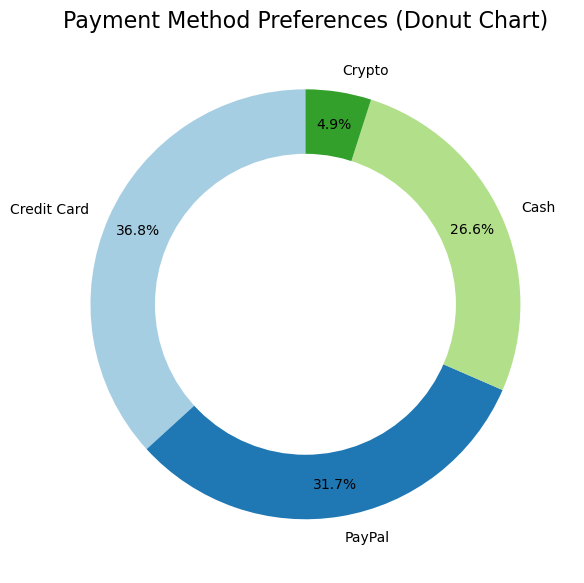

In [33]:
# Preparing data for the Donut Chart
payment_methods = df_final['Payment Method'].value_counts()

# Creating the Donut Chart
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    payment_methods,
    labels=payment_methods.index,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors  # Use a paired color palette for distinct segments
)

# Adding a circle to create a "donut" effect
center_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(center_circle)

# Chart details
plt.title('Payment Method Preferences (Donut Chart)', fontsize=16)
plt.tight_layout()
plt.show()

In [34]:
# Ensure 'Purchase Date' is in datetime format
df_final['Purchase Date'] = pd.to_datetime(df_final['Purchase Date'], errors='coerce')

# Calculate the first purchase date for each customer
customer_start_dates = df_final.groupby('Customer ID')['Purchase Date'].min()

# Calculate the tenure for each customer (difference between first purchase and today)
current_date = datetime.now()
customer_tenure = (current_date - customer_start_dates).dt.days

# Calculate the average customer tenure
average_tenure = customer_tenure.mean()

# Output the result
average_tenure

1492.6041918909295

In [35]:
# Calculating churn rate
total_customers = len(df_final['Customer ID'].unique())
churned_customers = df_final[df_final['Churn'] == 1]['Customer ID'].nunique()
churn_rate = (churned_customers / total_customers) * 100

churn_rate

20.003052347764154

In [36]:
# Preparing data for the interactive pie chart
churn_counts = df_final['Churn'].value_counts()
labels = ['Active Customers', 'Churned Customers']

# Creating the interactive pie chart
fig = px.pie(
    names=labels,
    values=churn_counts,
    title='Customer Churn Rate (Interactive)',
    color_discrete_sequence=['lightgreen', 'salmon']
)
fig.update_traces(hoverinfo='label+percent+value')
fig.show()

In [37]:
# Adding 'Gender' to the list of features
features = ['Total Purchase Amount', 'Customer Age', 'Returns', 'Gender']
target = 'Churn'

# Encoding the 'Gender' column using one-hot encoding to include both Female and Male
X = pd.get_dummies(df_final[features], columns=['Gender'])  # This will add both Gender_Female and Gender_Male
y = df_final[target]

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance and scale the data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [39]:
# Define the deep neural network model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, input_dim=len(X_train_scaled[0]), activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

c:\Users\zarap\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [40]:
# Check the structure of the model
nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 80)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         2,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,941 (11.49 KB)

 Trainable params: 2,941 (11.49 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, validation_split=0.15, epochs=50, verbose=1)

Epoch 1/50
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.7998 - loss: 0.5032 - val_accuracy: 0.8007 - val_loss: 0.5005
Epoch 2/50
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8004 - loss: 0.5008 - val_accuracy: 0.8007 - val_loss: 0.5006
Epoch 3/50
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8017 - loss: 0.4988 - val_accuracy: 0.8007 - val_loss: 0.4999
Epoch 4/50
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.7991 - loss: 0.5021 - val_accuracy: 0.8007 - val_loss: 0.4995
Epoch 5/50
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.7998 - loss: 0.5010 - val_accuracy: 0.8007 - val_loss: 0.4995
Epoch 6/50
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.7995 - loss: 0.5014 - val_accuracy: 0.8007 - val_loss: 0.4996
Epoch 7/50
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8004 - loss: 0.5001 - val_accuracy: 0.8007 - val_loss: 0.4995
Epoch 8/50
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.7987 - loss: 0

In [43]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3165/3165 - 3s - 910us/step - accuracy: 0.7997 - loss: 0.5009
Loss: 0.5008851289749146, Accuracy: 0.7997452020645142


In [44]:
# Define the improved deep neural network model
nn_improved = tf.keras.models.Sequential()

In [45]:
# Input layer and first hidden layer with dropout
nn_improved.add(tf.keras.layers.Dense(units=100, input_dim=len(X_train_scaled[0]), activation='relu'))
# Dropout with 20% of neurons dropped
nn_improved.add(Dropout(0.2))

In [46]:
# Second hidden layer with dropout
nn_improved.add(tf.keras.layers.Dense(units=50, activation='relu'))
nn_improved.add(Dropout(0.2))  # Dropout with 20% of neurons dropped
# Third hidden layer
nn_improved.add(tf.keras.layers.Dense(units=25, activation='relu'))

# Output layer
nn_improved.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [47]:
# Check the structure of the improved model
nn_improved.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 100)            │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,951 (27.15 KB)

 Trainable params: 6,951 (27.15 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Compile the improved model
nn_improved.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [49]:
# Train the improved model
fit_model_improved = nn_improved.fit(X_train_scaled, y_train, validation_split=0.15, epochs=75, batch_size=32, verbose=1)

Epoch 1/75
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7999 - loss: 0.5054 - val_accuracy: 0.8007 - val_loss: 0.4995
Epoch 2/75
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.7995 - loss: 0.5015 - val_accuracy: 0.8007 - val_loss: 0.4994
Epoch 3/75
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.7994 - loss: 0.5013 - val_accuracy: 0.8007 - val_loss: 0.4996
Epoch 4/75
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.7989 - loss: 0.5021 - val_accuracy: 0.8007 - val_loss: 0.4995
Epoch 5/75
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8005 - loss: 0.4998 - val_accuracy: 0.8007 - val_loss: 0.4994
Epoch 6/75
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.7995 - loss: 0.5012 - val_accuracy: 0.8007 - val_loss: 0.4995
Epoch 7/75
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8008 - loss: 0.4994 - val_accuracy: 0.8007 - val_loss: 0.4994
Epoch 8/75
8069/8069 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8000 - loss: 0

In [50]:
# Evaluate the improved model using the test data
model_loss_improved, model_accuracy_improved = nn_improved.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Improved Loss: {model_loss_improved}, Improved Accuracy: {model_accuracy_improved}")

3165/3165 - 3s - 881us/step - accuracy: 0.7997 - loss: 0.5008
Improved Loss: 0.5007871985435486, Improved Accuracy: 0.7997452020645142


In [51]:
# Save the improved model to an HDF5 file
nn_improved.save('nn_improved_model.h5')
print("Model saved as 'nn_improved_model.h5'")

Model saved as 'nn_improved_model.h5'


In [52]:
from tensorflow.keras.models import load_model

# Load the saved model
nn_improved_loaded = load_model('nn_improved_model.h5')
print("Model loaded successfully!")

Model loaded successfully!
